0.Intro

지하철과 함께 시민들의 발이 되어 주는 버스.

특히, 제주도같이 지하철을 이용할 수 없는 곳에서는 더더욱 소중하죠.

하지만, 필요할 때 타지 못한다면 결국은 무용지물!

승객들이 버스를 효율적으로 이용할 수 있게 하려면 어떻게 운영해야 할까요?

December, 2022, ver.001 | All rights reserved by Dacon

버스 운행 시간 예측 프로젝트에 참여하신 데이커 여러분, 환영합니다. 🙌
한국처럼 대중교통이 잘 발달한 나라도 세계적으로 드물다고 하죠.
특히나 도서 지방은 지리적 특성상 지하철을 설치하기 어려워 버스 의존도가 내륙에 비하여 더 높은 것이 현실입니다.

다 함께 제주도의 버스 운행 시간을 예측해서 더 쾌적한 제주도를 만들어 볼까요?

물류/운송 프로젝트 초보자도 함께하는 데이콘 프로젝트 교육, go go!

[프로젝트의 목적]

버스 운행 시간, next_arrive_time 을 예측
image

앞서 데이터 불러오기에서 test 데이터에는 train 데이터와 달리
버스 운행 시간, next_arrive_time 열이 없었던 것을 기억하시나요?

또 정답 제출용 파일인 sample_submission에는 next_arrive_time(버스 운행 시간) 데이터가 모두 0으로 채워져 있는 것을 보았습니다.

이를 통해 next_arrive_time(버스 운행 시간)을 예측하는 문제인 것을 확인했었죠!

다시 정리하면, 이번 프로젝트의 목적은 날짜, 운행 정보, 역 정보, 운행 시각 정보를 가지고 버스 운행 시간을 예측하는 것입니다.

1.데이터 불러오기

[문제 1]
앞에서 배운 내용을 바탕으로 빈칸을 채우고 데이터를 불러와봅시다.

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

2.train 데이터 확인하기

[문제 2]
앞에서 배운 내용을 바탕으로 train에서 상위 다섯개 데이터만 확인해 봅시다.
아래 빈칸을 채워주세요.

In [ ]:
train.head()

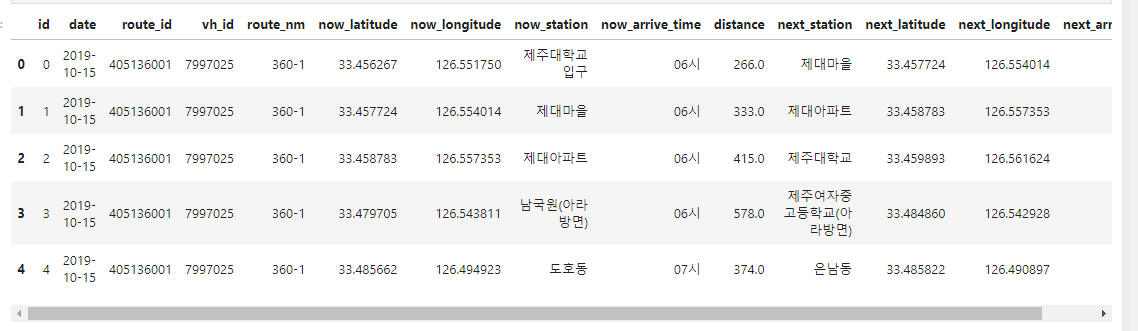

3.데이터프레임 정보 확인하기

길이, 특성의 이름, 결측치(비어있는 값)의 수 등을 확인해보세요.

In [ ]:
train.info()

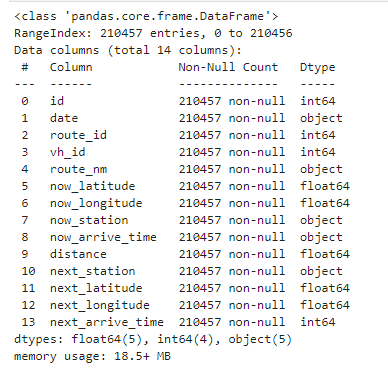

데이터를 살펴보니 총 14개의 열이 있네요! 하나하나 살펴보겠습니다.

id: 해당 데이터에서의 고유한 ID
date: 버스 운행 날짜
route_id: 버스 노선 ID
vh_id: 버스 ID
route_nm: 버스 노선 실제 번호
now_latitude: 현재 정류소의 위도
now_longitude: 현재 정류소의 경도
now_station: 현재 정류소 이름
now_arrive_time: 현재 정류장에 도착한 시간
distance: 현재 정류장에서 다음 정류장까지 실제 이동한 거리
next_station: 다음 정류소 이름
next_latitude: 다음 정류소의 위도
next_longitude: 다음 정류소의 경도
next_arrive_time: 다음 정류장에 도착할 때 까지 걸린 시간(단위: 초)을 의미하며, 우리가 구하고자 하는 값입니다.
info() 함수를 이용해 데이터 결측치 및 변수들의 타입을 확인해 본 결과,
train 데이터는 총 14개의 열과 210457개의 행으로 이루어져 있습니다.

또한 Non-Null Count를 살펴보면 모든 변수에서 결측치(누락된 데이터)는 존재하지 않는 것을 알 수 있습니다.
만약 결측치가 존재한다면 보다 정확한 모델을 설계하기 위해 적절하게 처리해 주어야 합니다.

train 데이터의 컬럼 정보는 아래와 같이 5개의 카테고리로 나눠서 생각할 수 있습니다.

날짜: date
운행 정보: route_id, vh_id, route_nm
역 정보:
현재 역 정보: now_latitude, now_longitude, now_station
다음 역 정보: next_station, next_latitude, next_longitude
운행 시각: now_arrive_time, distance
예측하고자 하는 대상(운행 시간): next_arrive_time
날짜 | 운행 정보 | 역 정보 | 운행 시각 | 운행 시간

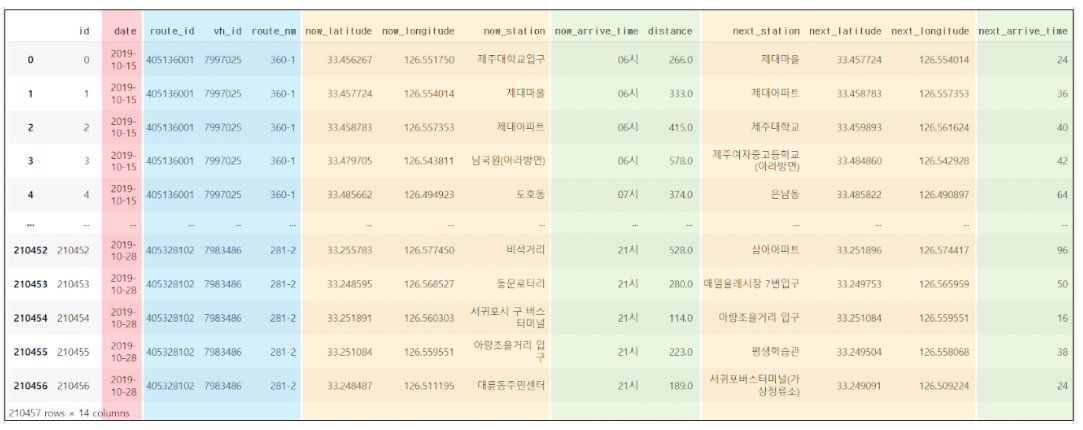

4.데이터 확인하기

위에서 test.csv를 test 변수로 할당을 해주었습니다.
test 데이터를 확인해보겠습니다.

In [ ]:
test.tail()

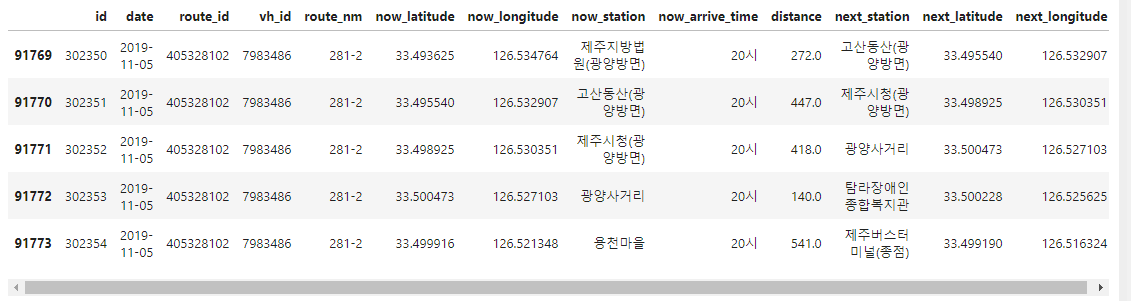

5.submission 데이터 확인

[문제 3]
submission에서 상위 다섯개 데이터만 확인해 봅시다.

In [ ]:
submission.head()

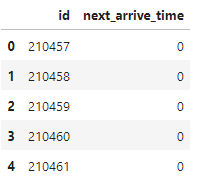

[데이터 분석을 위한 중요 개념]

그럼, 이 데이터들을 더욱 상세히 이해하기 위하여 데이터 분석을 위한 중요 개념들을 몇 가지 짚고 넘어가겠습니다.

Feature Vs Target
Numerical Data Vs Categorical Data
Regression Vs Classification
[Feature vs Target]

Feature: 예측을 위해 활용되는 데이터 (독립변수 X라고도 함)

Target: 예측하고자 하는 대상 (종속변수 y라고도 함)

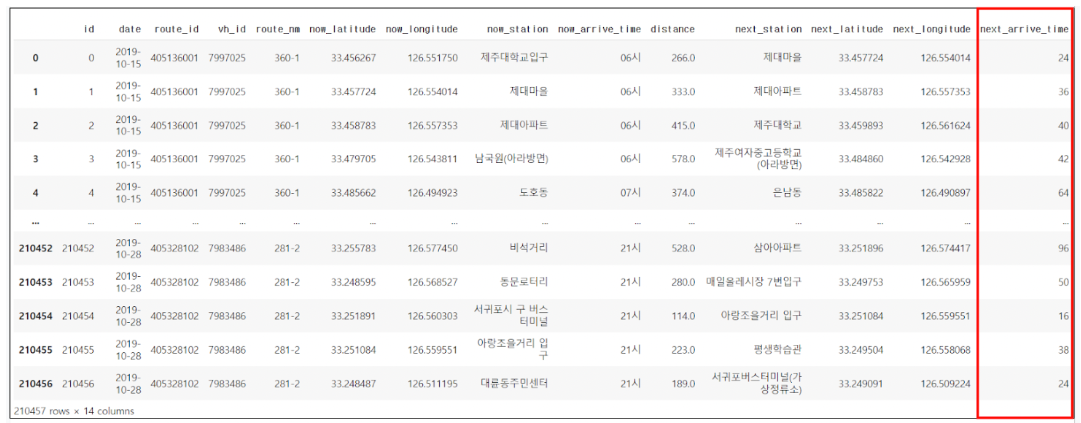

이번 버스 프로젝트에서 Feature와 Target은 다음과 같이 구분할 수 있습니다.

Feature: 날짜, 운행 정보, 역 정보 등
Target: 운행 시간
[Numerical Data vs Categorical Data]

Numerical Data: 수치형 자료, 숫자로 측정할 수 있는 자료 (ex. 기온, 풍속, 체중 등)
Categorical Data: 범주형 자료, 숫자로 측정할 수 없는 자료 (ex. 날씨, 혈액형, 성별 등)

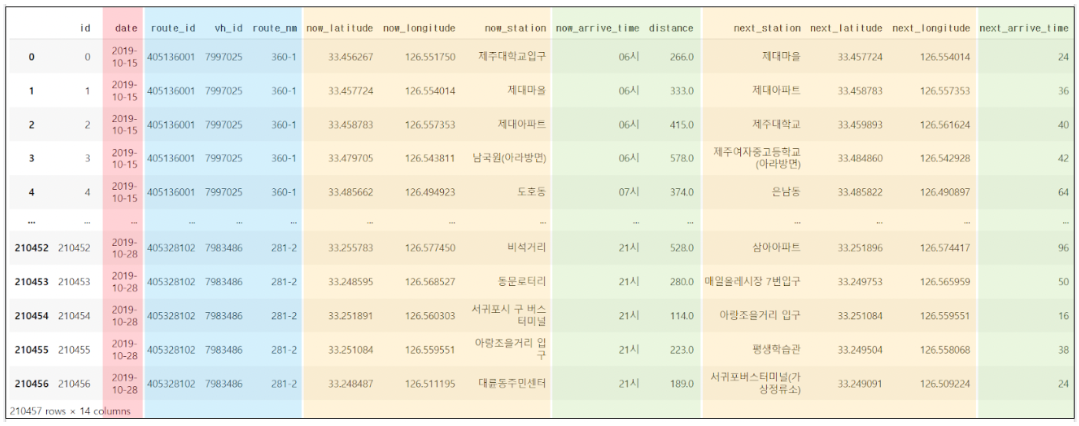

버스 프로젝트에서 Numerical Data와 Categorical Data 은 다음과 같습니다.

Categorical Data: now_station, now_arrive_time, next_station
Numerical Data: 그 외
[Regression vs Classification]

Regression (회귀) : Numerical Data(수치형 데이터) 예측에 사용 (ex. 주식 종가 예측)

Classificatio (분류) : Categorical Data(범주형 데이터) 예측에 사용 (ex. 주식 상승/하락 예측)

* Target(예측 대상)이 Numerical(수치형)인지 Categorical(범주형)인지에 따라

Regression(회귀) 문제인지 Classificaion(분류) 문제인지 결정됩니다.

[Regression Vs Classification]

Regression 문제와 Classification 문제가 잘 이해되었나요?

이해를 돕기 위해 아래의 그림을 살펴보도록 하겠습니다.

Fahrenheit(화씨 온도) 데이터는 어떤 문제일까요?

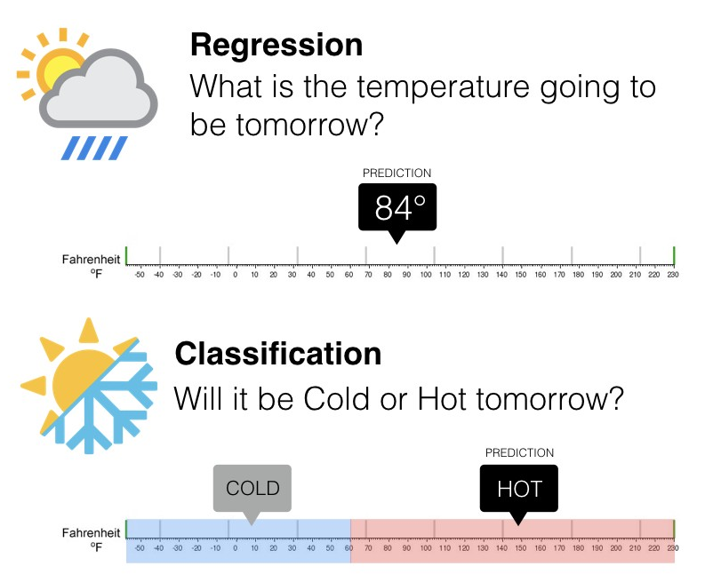

우선 화씨 온도(84도, ...)는 Numerical Data(수치형 자료)입니다.
수치형 자료를 예측하는 것은 Regression(회귀) 문제입니다.

그런데 특정 기온(ex.60도)을 기준으로 COLD(추운 날)과 HOT(더운 날)을 예측할 수 있지 않을까요?
COLD와 HOT의 Categorical Data(범주형 자료)를 예측하는 것은 Classification(분류) 문제이죠!

* 이처럼 하나의 데이터(Fahrenheit)를 가지고도 어떻게 사용하느냐에 따라서 분석 프로젝트의 목적(Regression vs Classification)이 달라질 수 있습니다.

6.train셋 drop()

앞서 데이터의 형태와 변수들을 살펴보는 과정에서
우리가 가진 데이터가 문자형 변수와 수치형 변수, 2가지 형태로 존재하는 것을 확인했어요.

문자형 변수의 경우 부가적인 처리 과정이 필요하답니다.
이번 스테이지에서는 수치형 데이터만 활용할 예정이므로, 문자형 변수는 drop() 메소드를 이용해 제거해 주도록 할게요.

In [ ]:
train = train.drop(['id','date','route_nm','now_station','now_arrive_time','next_station'],axis = 1)

7.test셋 drop()

[문제 4]

train 셋에서 텍스트형 변수가 제거되었습니다!

이번에는 직접 train에 적용한 전처리 과정을 test 데이터에 적용해 보세요!

In [ ]:
# test 데이터에서도 텍스트형 변수를 제거 합니다.
test = test.drop(['id','date','route_nm','now_station','now_arrive_time','next_station'],axis = 1)

8.Feature Selection

이제 우리는 모델을 만들어야 합니다.
모델링을 하기 앞서, 독립변수 X와 종속변수(타깃변수) y를 설정해야 해요.

해당 프로젝트의 목표는 버스 운행 시간의 예측값을 맞히는 것이기 때문에
예측할 변수, Target은 next_arrive_time 입니다.

그럼 모델링을 하기 위하여 train 데이터에서 학습에 사용할 변수 X와 예측할 변수 y를 분리해 볼까요?

In [ ]:
# 예측할 변수 y 할당
y = train['next_arrive_time']

# y 데이터를 다시 살펴봅니다.
y.head()

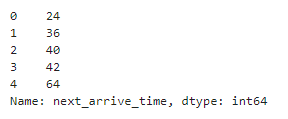

9.독립변수 X 설정
우리가 모델을 학습시킬 때 이용할 독립변수는 총 7개입니다.

route_id
vh_id
now_latitude
now_longitude
distance
next_latitude
next_longitude

[문제 5]
이제 train 데이터에서 종속변수 y를 제외한 독립변수 X를 직접 설정해 보세요.
데이터프레임에 칼럼명이 담긴 리스트로 인덱싱을 하면, 원하는 칼럼을 추출할 수 있습니다.

In [ ]:
# 학습에 사용할 변수 X 할당
x = train['route_id', 'vh_id', 'now_latitude', 'now_longitude', 'distance', 'next_latitude', 'next_longitude']

[모델링 콘셉트]

모델링은 보통 다음과 같은 순서로 진행됩니다.

모델 선택
파이썬 라이브러리를 활용하여 분석에 사용할 모델을 정의
(이번 프로젝트에서는 sklearn 라이브러리를 활용)
모델 학습
프로젝트에서 제공하는 train 데이터를 이용하여 1번에서 정의된 모델 학습 수행
(sklearn을 통해 정의된 모델은 fit() 함수를 이용해 학습)
예측
학습된 모델을 바탕으로 프로젝트의 목표인 test 데이터를 예측
(sklearn을 통해 정의되고 학습된 모델은 predict() 함수를 이용해 예측)
정답 파일 생성
본인의 점수를 공개하고 순위를 확인하기 위하여 정답 파일 생성 및 제출 필요
(해당 과정은 경진 대회를 위해서는 필수적인 과정이지만 일반적인 데이터 분석 모델링 과정에서는 불필요)

10.모델 선택

선형 회귀(Linear Regression)
이번 스테이지에서 사용할 모델은 선형 회귀(Linear Regression) 모델입니다.

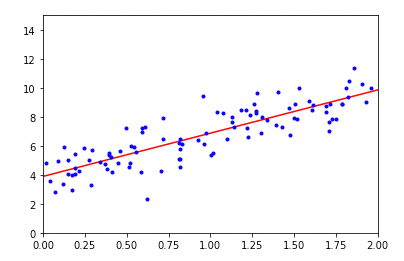

사진 출처 - https://velog.io/@changhtun1/python-선형-회귀-이론-및-실습
선형 회귀란, 예측하고자 하는 종속변수 y와 독립변수 x의 관계를 가장 잘 나타내는 선(Line)을 구하는 회귀 분석 방법입니다.
즉, 선형 회귀 모델은 '회귀 계수(regression coefficient)를 선형 결합으로 표현할 수 있는 모델'을 말합니다.

선형 회귀 모델은 주로 수치 예측 문제에 사용되는데요!
위 그래프에서 빨간색 선(Linear regression)은 파란색 점들로 표현된 x와 y의 관계를 잘 나타내고 있죠.
이처럼 우리는 선형 회귀 분석을 통해 'X값이 증가할수록 y값도 증가한다'는 관계를 확인할 수 있으며, 이를 통해 새로운 X값이 등장했을 때에도 그 X값에 해당하는 y값이 어디쯤에 위치할지 어느 정도 예측할 수 있게 됩니다.

즉, 독립변수 X를 이용해서 수치형 종속변수 y를 예측할 수 있게 되는 것이죠!

선형 모델은 파라미터가 선형식으로 표현하기 때문에 유연성이 떨어지지만, 파라미터를 추정하거나 모델을 해석할 때 비선형 모델에 비해 유리하다는 특징이 있습니다.

이번 과정에서는 sklearn 패키지를 이용해 간단하게 실습해 보도록 하겠습니다!

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델 선언(선택)
model = LinearRegression()

11.모델 학습

이제 모델을 학습 및 예측시켜 볼까요?

선언된 모델은 fit() 메소드를 이용해 학습시킬 수 있어요.

In [ ]:
# 모델 학습
model.fit(X, y)

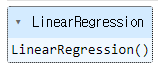

12.모델 예측

학습된 모델에 predict() 메소드를 사용하면 결괏값을 예측할 수 있어요.

In [ ]:
# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

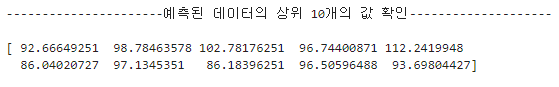

13.제출 파일 생성 및 제출

앞서 sample_submission.csv 제출용 파일을 이용하여

우리가 모델링으로 예측한 next_arrive_time(버스 운행 시간) 값을 채워 보죠!

In [ ]:
submission['next_arrive_time'] = predict
submission.head()

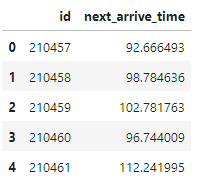

14.csv 파일 생성
submission 의 next_arrive_time 값이 LinearRegression 모델의 예측값으로 잘 채워졌습니다.

그럼 지난 시간과 마찬가지로 제출용 파일 submission.csv을 생성해 보죠!

In [ ]:
submission.to_csv('submission.csv', index=False)